In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN
import matplotlib.pyplot as plt

In [5]:
ticker = '^NSEI'
df = yf.download(ticker, start='2023-10-01', end='2024-10-01')

[*********************100%***********************]  1 of 1 completed


In [6]:
data = df['Close'].values
data = data.reshape(-1, 1)

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [8]:
training_data_len = int(np.ceil(0.8 * len(scaled_data)))

In [9]:
train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]

In [10]:
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [15]:
model = Sequential()
# Explicitly define the input_shape using a tuple
model.add(TCN(input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

/Users/divyanshu/PycharmProjects/MiniProject/.venv/lib/python3.12/site-packages/tcn/tcn.py:227: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


In [16]:
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1453
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3539
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1869
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1402
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1053
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1087
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0800
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0859
Epoch 9/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0745
Epoch 10/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0773


In [17]:
x_test, y_test = [], data[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get predicted prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


In [41]:
future_steps = 20
last_sequence = test_data[-60:].reshape(1, 60, 1)
future_predictions = []

for i in range(future_steps):
    next_price = model.predict(last_sequence)
    future_predictions.append(next_price[0, 0])
    last_sequence = np.append(last_sequence[:, 1:, :], np.reshape(next_price, (1, 1, 1)), axis=1)

# Inverse scale future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


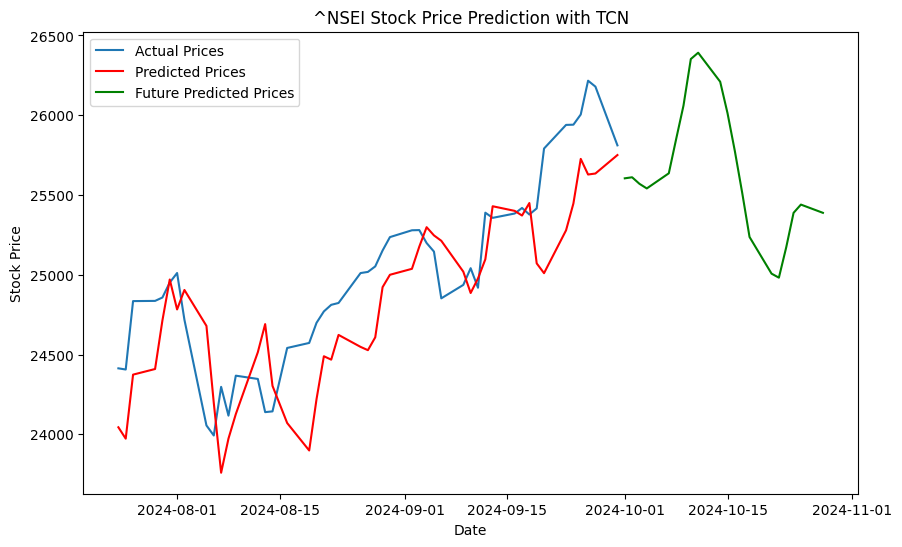

In [42]:
plt.figure(figsize=(10,6))
plt.plot(df.index[training_data_len:], y_test, label='Actual Prices')
plt.plot(df.index[training_data_len:], predictions, label='Predicted Prices', color='red')

# Create future date range for the next 30 days
future_dates = pd.date_range(start=df.index[-1], periods=future_steps + 1, freq='B')[1:]

plt.plot(future_dates, future_predictions, label='Future Predicted Prices', color='green')
plt.title(f'{ticker} Stock Price Prediction with TCN')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

forecasted_values = np.array(future_predictions)
forecasted_values

array([[25604.27 ],
       [25610.83 ],
       [25569.89 ],
       [25540.896],
       [25635.74 ],
       [25850.264],
       [26059.951],
       [26351.85 ],
       [26391.402],
       [26209.584],
       [26012.537],
       [25774.816],
       [25513.703],
       [25236.73 ],
       [25006.887],
       [24981.613],
       [25172.225],
       [25387.986],
       [25439.67 ],
       [25387.979]], dtype=float32)

In [47]:
raw_actual = yf.download(ticker, start='2024-10-01', end='2024-10-30')

[*********************100%***********************]  1 of 1 completed


In [48]:
raw_actual.dropna(inplace=True)
actual_values = np.array(raw_actual['Close'])

actual_values

array([[25796.90039062],
       [25250.09960938],
       [25014.59960938],
       [24795.75      ],
       [25013.15039062],
       [24981.94921875],
       [24998.44921875],
       [24964.25      ],
       [25127.94921875],
       [25057.34960938],
       [24971.30078125],
       [24749.84960938],
       [24854.05078125],
       [24781.09960938],
       [24472.09960938],
       [24435.5       ],
       [24399.40039062],
       [24180.80078125],
       [24339.15039062],
       [24466.84960938]])

In [49]:
mape = np.mean(np.abs((actual_values - forecasted_values) / actual_values)) * 100

In [50]:
mae = mean_absolute_error(actual_values, forecasted_values)

In [51]:
rmse = np.sqrt(mean_squared_error(actual_values, forecasted_values))

In [52]:
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Percentage Error (MAPE): 3.32%
Mean Absolute Error (MAE): 823.68
Root Mean Squared Error (RMSE): 883.87


In [55]:
df_tcn = pd.DataFrame(forecasted_values)
df_tcn.dropna(inplace=True)
df_tcn.to_csv('/Users/divyanshu/PycharmProjects/MiniProject/tcn.csv')